In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from sklearn.model_selection import train_test_split

In [172]:
df = pd.read_csv('flight_delays 1.csv', header = 0, sep=',')

In [173]:
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


In [174]:
def do_norm_table():
    df['Month']= df['Month'].apply(lambda x: x.split('-')[1])
    df['Month'] = df['Month'].apply(int)
    df['DayofMonth'] = df['DayofMonth'].apply(lambda x: x.split('-')[1])
    df['DayofMonth'] = df['DayofMonth'].apply(int)
    df['DayOfWeek'] = df['DayOfWeek'].apply(lambda x: x.split('-')[1])
    df['DayOfWeek'] = df['DayOfWeek'].apply(int)


In [175]:
do_norm_table()
def no_yes(val):
    if 'Y' in val:
        return 1
    else:
        return 0
df['dep_delayed_15min'] = df['dep_delayed_15min'].apply(lambda x: no_yes(x))

df_delay = df[df.dep_delayed_15min==1]
df_nodelay = df[df['dep_delayed_15min']==0]
delays = len(df_delay)
nodelays = len(df_nodelay)
airlines = sorted(df.UniqueCarrier.unique())
origins= sorted(df.Origin.unique(), reverse=True)
destinations= sorted(df.Dest.unique(), reverse=True)
numAirlines= len(airlines)
numOrigins= len(origins)
numDestinations = len(destinations)
minDist = df.Distance.min()
maxDist = df.Distance.max()

In [228]:
print('Количество задержек - ',delays)
print('Количество без задержек - ',nodelays)
print('Список Кодов аэропорта ИАТА - ',airlines)
print('Список эропортов откуда был вылет - ',origins)
# print('Место назначения - ',destinations) # ПОВТОРЯЕТ origins
print('Количество Авиакомпаний - ',numAirlines)
print('Количество аэропортов откуда был вылет - ',numOrigins)
print('Количество аэропортов куда был вылет - ',numDestinations)
print('Минимальная дистранция в км - ',minDist)
print('Максимальная дистранция в км - ',maxDist)

Количество задержек -  19044
Количество без задержек -  80956
Список Кодов аэропорта ИАТА -  ['AA', 'AQ', 'AS', 'B6', 'CO', 'DH', 'DL', 'EV', 'F9', 'FL', 'HA', 'HP', 'MQ', 'NW', 'OH', 'OO', 'TZ', 'UA', 'US', 'WN', 'XE', 'YV']
Список эропортов откуда был вылет -  ['YUM', 'YAK', 'XNA', 'WYS', 'WRG', 'VPS', 'VLD', 'VIS', 'VCT', 'TYS', 'TYR', 'TXK', 'TWF', 'TVC', 'TUS', 'TUP', 'TUL', 'TRI', 'TPA', 'TOL', 'TLH', 'TEX', 'SYR', 'SWF', 'SUN', 'STX', 'STT', 'STL', 'SRQ', 'SPS', 'SPI', 'SNA', 'SMX', 'SMF', 'SLC', 'SJU', 'SJT', 'SJC', 'SIT', 'SHV', 'SGU', 'SGF', 'SFO', 'SEA', 'SDF', 'SCE', 'SCC', 'SBP', 'SBN', 'SBA', 'SAV', 'SAT', 'SAN', 'RSW', 'RST', 'ROC', 'ROA', 'RNO', 'RIC', 'RFD', 'RDU', 'RDM', 'RDD', 'RAP', 'PWM', 'PVD', 'PSP', 'PSG', 'PSE', 'PSC', 'PNS', 'PIT', 'PIH', 'PIE', 'PIA', 'PHX', 'PHL', 'PHF', 'PFN', 'PDX', 'PBI', 'OXR', 'OTZ', 'ORF', 'ORD', 'ONT', 'OME', 'OMA', 'OKC', 'OGG', 'OAK', 'OAJ', 'MYR', 'MTJ', 'MSY', 'MSP', 'MSO', 'MSN', 'MRY', 'MQT', 'MOT', 'MOD', 'MOB', 'MLU', 'MLI', '

In [224]:
minDist

30

In [176]:
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,AA,ATL,DFW,732,0
1,4,20,3,1548,US,PIT,MCO,834,0
2,9,2,5,1422,XE,RDU,CLE,416,0
3,11,25,6,1015,OO,DEN,MEM,872,0
4,10,7,6,1828,WN,MDW,OMA,423,1
...,...,...,...,...,...,...,...,...,...
99995,5,4,3,1618,OO,SFO,RDD,199,0
99996,1,18,3,804,CO,EWR,DAB,884,0
99997,1,24,2,1901,NW,DTW,IAH,1076,0
99998,4,27,4,1515,MQ,DFW,GGG,140,0


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
Month                100000 non-null int64
DayofMonth           100000 non-null int64
DayOfWeek            100000 non-null int64
DepTime              100000 non-null int64
UniqueCarrier        100000 non-null object
Origin               100000 non-null object
Dest                 100000 non-null object
Distance             100000 non-null int64
dep_delayed_15min    100000 non-null int64
dtypes: int64(6), object(3)
memory usage: 6.9+ MB


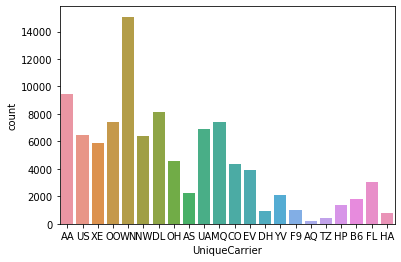

In [194]:
sns.countplot(x='UniqueCarrier', data=df)

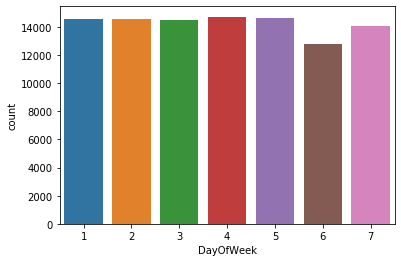

In [212]:
sns.countplot(x="DayOfWeek",data=df)

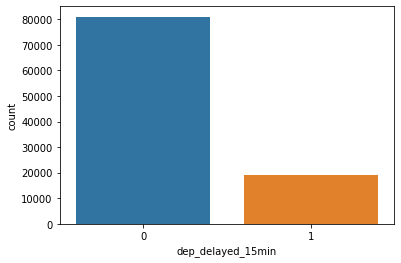

In [178]:
sns.countplot(x="dep_delayed_15min",data=df)

In [210]:
procentage = round(df['dep_delayed_15min'].value_counts() * 100 / len(df),1)

In [211]:
procentage

0    81.0
1    19.0
Name: dep_delayed_15min, dtype: float64

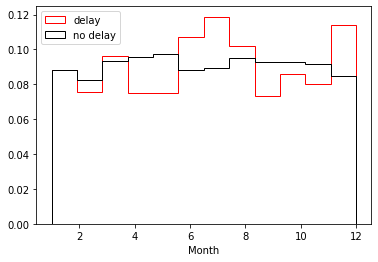

In [205]:
Ycol = ["red"]
Ncol = ["black"]


plt.hist(df_delay.Month,bins=12,align="mid", color=Ycol,histtype="step",label="delay",density=True)
plt.hist(df_nodelay.Month,bins=12,align="mid", color=Ncol,histtype="step",label="no delay",density=True)
plt.xlabel("Month")
plt.legend(prop={'size': 10},loc="upper left")

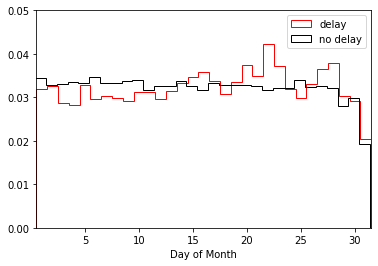

In [180]:
plt.hist(df_delay.DayofMonth,bins=31,range=[0.5,31.5],align="mid",
               color=Ycol,histtype="step",label="delay",density=True)
plt.hist(df_nodelay.DayofMonth,bins=31,range=[0.4,31.4],align="mid",
               color=Ncol,histtype="step",label="no delay",density=True)
plt.xlabel("Day of Month")
plt.xlim(0.5,31.5)
plt.ylim(0.0,0.05)
plt.legend(prop={'size': 10},loc="upper right")

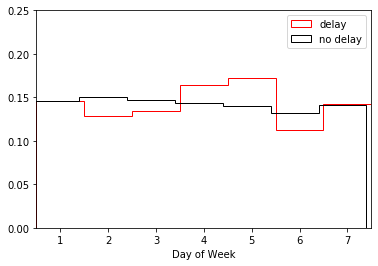

In [181]:
plt.hist(df_delay.DayOfWeek,bins=7,range=[0.5,7.5],align="mid",
               color=Ycol,histtype="step",label="delay",density=True)
plt.hist(df_nodelay.DayOfWeek,bins=7,range=[0.4,7.4],align="mid",
               color=Ncol,histtype="step",label="no delay",density=True)
plt.xlabel("Day of Week")
plt.xlim(0.5,7.5)
plt.ylim(0.0,0.25)
plt.legend(prop={'size': 10},loc="upper right")

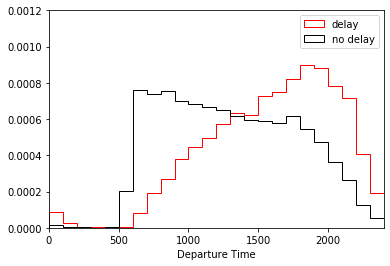

In [182]:
plt.hist(df_delay.DepTime,bins=24,range=[0,2400],
               color=Ycol,histtype="step",label="delay",density=True)
plt.hist(df_nodelay.DepTime,bins=24,range=[0,2400],
               color=Ncol,histtype="step",label="no delay",density=True)
plt.xlabel("Departure Time")
plt.xlim(0.0,2400.0)
plt.ylim(0.0,0.0012)
plt.legend(prop={'size': 10},loc="upper right")

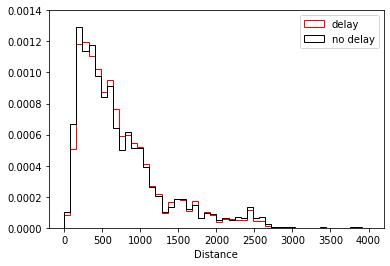

In [183]:
plt.hist(df_delay.Distance,bins=50,range=[0,4000],
               color=Ycol,histtype="step",label="delay",density=True)
plt.hist(df_nodelay.Distance,bins=50,range=[0,4000],
               color=Ncol,histtype="step",label="no delay",density=True)
plt.xlabel("Distance")
plt.ylim(0.0,0.0014)
plt.legend(prop={'size': 10},loc="upper right")

In [184]:
df2 = pd.get_dummies(df,drop_first=False)
print(df2.describe(percentiles=[], include="all"))

               Month     DayofMonth     DayOfWeek        DepTime  \
count  100000.000000  100000.000000  100000.00000  100000.000000   
mean        6.537640      15.703850       3.95183    1341.523880   
std         3.413447       8.793931       1.99164     476.378445   
min         1.000000       1.000000       1.00000       1.000000   
50%         7.000000      16.000000       4.00000    1330.000000   
max        12.000000      31.000000       7.00000    2534.000000   

           Distance  dep_delayed_15min  UniqueCarrier_AA  UniqueCarrier_AQ  \
count  100000.00000       100000.00000      100000.00000     100000.000000   
mean      729.39716            0.19044           0.09418          0.002340   
std       574.61686            0.39265           0.29208          0.048317   
min        30.00000            0.00000           0.00000          0.000000   
50%       575.00000            0.00000           0.00000          0.000000   
max      4962.00000            1.00000           1.0000

# Сложно

In [185]:
# import numpy as np
# from collections import Counter

# # Given two histograms x and y (with the same range and binning), the following function
# # calculates the intrinsic discrepancy (a symmetrized Kullback-Leibler distance) between them.
# def intrinsic_discrepancy(x,y):
#     assert len(x)==len(y)
#     sumx = np.sum(x)
#     sumy = np.sum(y)
#     xiny = False
#     yinx = False
#     for (xval,yval) in zip(x,y):
#         if xval==0 and yval>0:
#             xiny = True
#         if xval>0 and yval==0:
#             yinx = True
#     if xiny and yinx:         # x and y supports not nested
#         return float("inf")
#     elif xiny:                # x support nested in y support
#         id1  = 0.0
#         for (xval,yval) in zip(x,y):
#             if xval>0 and yval>0:
#                 id1 += (float(xval)/sumx) * np.log((float(xval)/sumx)/(float(yval)/sumy))
#         return id1
#     elif yinx:                # y support nested in x support
#         id2  = 0.0
#         for (xval,yval) in zip(x,y):
#             if xval>0 and yval>0:
#                 id2 += (float(yval)/sumy) * np.log((float(yval)/sumy)/(float(xval)/sumx))
#         return id2
#     else:                     # x and y supports identical
#         id1  = 0.0
#         id2  = 0.0
#         for (xval,yval) in zip(x,y):
#             if (xval>0) and (yval>0):
#                 id1 += (float(xval)/sumx) * np.log((float(xval)/sumx)/(float(yval)/sumy))
#                 id2 += (float(yval)/sumy) * np.log((float(yval)/sumy)/(float(xval)/sumx))
#         return min(id1,id2)

# int_discr = {}
# bin_edges        = np.linspace(0.5,12.5,13)
# hist1,bin_edges1 = np.histogram(df_delay.Month,   bins=bin_edges, density=False)
# hist2,bin_edges2 = np.histogram(df_nodelay.Month, bins=bin_edges, density=False)
# int_discr["Month"] = intrinsic_discrepancy(hist1,hist2)
# bin_edges        = np.linspace(0.5,31.5,32)
# hist1,bin_edges1 = np.histogram(df_delay.DayofMonth,   bins=bin_edges, density=False)
# hist2,bin_edges2 = np.histogram(df_nodelay.DayofMonth, bins=bin_edges, density=False)
# int_discr["Day of the Month"] = intrinsic_discrepancy(hist1,hist2)
# bin_edges        = np.linspace(0.5,7.5,8)
# hist1,bin_edges1 = np.histogram(df_delay.DayOfWeek,   bins=bin_edges, density=False)
# hist2,bin_edges2 = np.histogram(df_nodelay.DayOfWeek, bins=bin_edges, density=False)
# int_discr["Day of the Week"] = intrinsic_discrepancy(hist1,hist2)
# bin_edges        = np.linspace(0.0,2400.0,24)
# hist1,bin_edges1 = np.histogram(df_delay.DepTime,   bins=bin_edges, density=False)
# hist2,bin_edges2 = np.histogram(df_nodelay.DepTime, bins=bin_edges, density=False)
# int_discr["Departure Time"] = intrinsic_discrepancy(hist1,hist2)
# bin_edges        = np.linspace(0.0,5000.0,125)
# hist1,bin_edges1 = np.histogram(df_delay.Distance,   bins=bin_edges, density=False)
# hist2,bin_edges2 = np.histogram(df_nodelay.Distance, bins=bin_edges, density=False)
# int_discr["Distance"] = intrinsic_discrepancy(hist1,hist2)
# hist             = df.groupby(["Origin","dep_delayed_15min"]).size()
# mulind           = pd.MultiIndex.from_product([origins, [False, True]])
# hist             = hist.reindex(mulind).replace(np.nan, 0)
# hist1            = [hist[origin,True] for origin in origins]
# hist2            = [hist[origin,False] for origin in origins]
# int_discr["Origin"] = intrinsic_discrepancy(hist1,hist2)
# hist             = df.groupby(["Dest","dep_delayed_15min"]).size()
# mulind           = pd.MultiIndex.from_product([destinations, [False, True]])
# hist             = hist.reindex(mulind).replace(np.nan, 0)
# hist1            = [hist[destination,True] for destination in destinations]
# hist2            = [hist[destination,False] for destination in destinations]
# int_discr["Destination"] = intrinsic_discrepancy(hist1,hist2)
# hist             = df.groupby(["UniqueCarrier","dep_delayed_15min"]).size()
# mulind           = pd.MultiIndex.from_product([airlines, [False, True]])
# hist             = hist.reindex(mulind).replace(np.nan, 0)
# hist1            = [hist[airline,True] for airline in airlines]
# hist2            = [hist[airline,False] for airline in airlines]
# int_discr["Airline"] = intrinsic_discrepancy(hist1,hist2)

# id_list = Counter(int_discr).most_common()
# print('Intrinsic discrepancies between delay and no-delay, in decreasing order: ')
# for item in id_list:
#     print('   %f  (%s)' % (item[1],item[0]))

# Сложно

In [186]:
# df2_delay   = df2[df2.dep_delayed_15min==True]
# df2_nodelay = df2[df2.dep_delayed_15min==False]

# int_discr = {}
# bin_edges        = np.linspace(0.5,12.5,13)
# hist1,bin_edges1 = np.histogram(df2_delay.Month,   bins=bin_edges, density=False)
# hist2,bin_edges2 = np.histogram(df2_nodelay.Month, bins=bin_edges, density=False)
# int_discr["Month"] = intrinsic_discrepancy(hist1,hist2)
# bin_edges        = np.linspace(0.5,31.5,32)
# hist1,bin_edges1 = np.histogram(df2_delay.DayofMonth,   bins=bin_edges, density=False)
# hist2,bin_edges2 = np.histogram(df2_nodelay.DayofMonth, bins=bin_edges, density=False)
# int_discr["Day of the Month"] = intrinsic_discrepancy(hist1,hist2)
# bin_edges        = np.linspace(0.5,7.5,8)
# hist1,bin_edges1 = np.histogram(df2_delay.DayOfWeek,   bins=bin_edges, density=False)
# hist2,bin_edges2 = np.histogram(df2_nodelay.DayOfWeek, bins=bin_edges, density=False)
# int_discr["Day of the Week"] = intrinsic_discrepancy(hist1,hist2)
# bin_edges        = np.linspace(0.0,2400.0,24)
# hist1,bin_edges1 = np.histogram(df2_delay.DepTime,   bins=bin_edges, density=False)
# hist2,bin_edges2 = np.histogram(df2_nodelay.DepTime, bins=bin_edges, density=False)
# int_discr["Departure Time"] = intrinsic_discrepancy(hist1,hist2)
# bin_edges        = np.linspace(0.0,5000.0,125)
# hist1,bin_edges1 = np.histogram(df2_delay.Distance,   bins=bin_edges, density=False)
# hist2,bin_edges2 = np.histogram(df2_nodelay.Distance, bins=bin_edges, density=False)
# int_discr["Distance"] = intrinsic_discrepancy(hist1,hist2)

# # Now do the dummy variables, starting at column 7 to skip the 6 columns we already did, 
# # plus the response column "dep_delayed_15min".
# bin_edges   = np.linspace(-0.5, 1.5, 3)
# for cname in list(df2.columns.values)[7:]:
#     hist1,bin_edges1 = np.histogram(df2_delay[cname],   bins=bin_edges, density=False)
#     hist2,bin_edges2 = np.histogram(df2_nodelay[cname], bins=bin_edges, density=False)
#     int_discr[cname] = intrinsic_discrepancy(hist1, hist2)
    
# id_list  = Counter(int_discr).most_common()
# ndisplay = 20
# print('Top %i intrinsic discrepancies between delay and no-delay, in decreasing order: ' %ndisplay)
# for item in id_list[:ndisplay]:
#     print('   %f  (%s)' % (item[1],item[0]))

In [187]:
import numpy as np
from sklearn.model_selection import train_test_split

test_fraction     = 0.30  # Fraction of total data set used for testing.
adjust_prevalence = False # Set to True to modify the prevalence in the training and/or testing data sets.
test_prevalence   = 0.60  # Desired prevalence in testing data set, only used if adjust_prevalence = True
train_prevalence  = 0.45  # Desired prevalence in training data set, only used if adjust_prevalence = True

np.random.seed(1)         # Random numbers are used by routine selectSubarray

# Routine to randomly mask off a fraction frac of elements equal to elval in array arr.
def selectSubarray( arr, elval, frac ):
    mask = np.ones(len(arr), dtype=bool)
    for ind,val in enumerate(arr):
        if val == elval:
            if np.random.uniform() <= frac:
                mask[ind] = False
    return mask

# Convert pandas dataframe to its numpy representation, separating out features from target variable.
features = df2.columns.values.tolist()
features.remove("dep_delayed_15min")
X0 = df2.as_matrix(columns=features)
Y0 = np.array([int(ybool) for ybool in df2["dep_delayed_15min"].tolist()])

# Make sure desired prevalences are larger than initial prevalence.
prev = float(len([y for y in Y0 if y==1]))/len(Y0)
print("Initial data set prevalence: %f" %prev)
assert test_prevalence >= prev,  "Desired test data set prevalence below current value"
assert train_prevalence >= prev, "Desired train data set prevalence below current value"

# If adjusting the prevalence differently in training and test data sets, the fraction of test data 
# needs to be adjusted to compensate.
if adjust_prevalence:
    test_f  = 1.0/(1.0+(train_prevalence/test_prevalence)*(1.0/test_fraction-1.0))
    test_d  = (1.0/prev - 1.0/test_prevalence)/(1.0/prev - 1.0)
    train_d = (1.0/prev - 1.0/train_prevalence)/(1.0/prev - 1.0)
else:
    test_f  = test_fraction

# Create training and test sets, with desired proportions.
X_train0, X_test0, y_train0, y_test0 = train_test_split(X0, Y0, test_size=test_f, random_state=0)

# Adjust prevalences by removing data points belonging to class 0.
if adjust_prevalence:
    mask    = selectSubarray( y_train0, 0, train_d)
    X_train = X_train0[mask]
    y_train = y_train0[mask]
    mask    = selectSubarray( y_test0, 0, test_d)
    X_test  = X_test0[mask]
    y_test  = y_test0[mask]
    X       = np.append( X_train, X_test, axis=0)
    Y       = np.append( y_train, y_test, axis=0)
else:
    X_train = X_train0[:]
    y_train = y_train0[:]
    X_test  = X_test0[:]
    y_test  = y_test0[:]
    X       = X0[:]
    Y       = Y0[:]

print("Training set size: %i, test set size: %i, total: %i, test fraction: %f" \
      %(len(y_train),len(y_test),len(Y),float(len(y_test))/len(Y)))
train_prevalence = float(len([y for y in y_train if y==1]))/len(y_train)
test_prevalence  = float(len([y for y in y_test if y==1]))/len(y_test)
print("Prevalence in training set: %f, in test set: %f" %(train_prevalence,test_prevalence))

F:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Initial data set prevalence: 0.190440
Training set size: 70000, test set size: 30000, total: 100000, test fraction: 0.300000
Prevalence in training set: 0.191086, in test set: 0.188933


In [188]:
from sklearn.ensemble import RandomForestClassifier

rf2 = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_leaf=2, 
                             criterion="gini", min_samples_split=2, min_weight_fraction_leaf=0.0, 
                             max_features="auto", max_leaf_nodes=None, bootstrap=True,
                             oob_score=True, verbose=0, warm_start=False, random_state=0, 
                             n_jobs=-1, class_weight="balanced_subsample")
%time rf2.fit(X_train, y_train)

Wall time: 31.3 s


RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=True,
                       random_state=0, verbose=0, warm_start=False)

In [189]:
from sklearn.metrics import classification_report, confusion_matrix

print("Estimator currently in use:\n\n%s\n" %rf2)

# score the model
Ntest    = len(y_test)
Ntestpos = len([val for val in y_test if val])
NullAcc  = float(Ntest-Ntestpos)/Ntest
print("Mean accuracy on Training set: %s" %rf2.score(X_train, y_train))
print("Mean accuracy on Test set:     %s" %rf2.score(X_test, y_test))
print("Null accuracy on Test set:     %s" %NullAcc)
print(" ")
y_true, y_pred = y_test, rf2.predict(X_test)
cm             = confusion_matrix(y_true, y_pred)
print("Confusion matrix:\ntn=%6d  fp=%6d\nfn=%6d  tp=%6d" %(cm[0][0],cm[0][1],cm[1][0],cm[1][1]))
print("\nDetailed classification report: \n%s" %classification_report(y_true, y_pred))

Estimator currently in use:

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=True,
                       random_state=0, verbose=0, warm_start=False)

Mean accuracy on Training set: 0.6476571428571428
Mean accuracy on Test set:     0.6192
Null accuracy on Test set:     0.8110666666666667
 
Confusion matrix:
tn= 14545  fp=  9787
fn=  1637  tp=  4031

Detailed classification report: 
              precision    recall  f1-score   support

           0       0.90      0.60      0.72     24332
           1       0.29      0.71      0.41      5668

    accuracy                           0.62     30000
   macro avg       

Number of test values = 30000
Number of test values equal to True = 5668


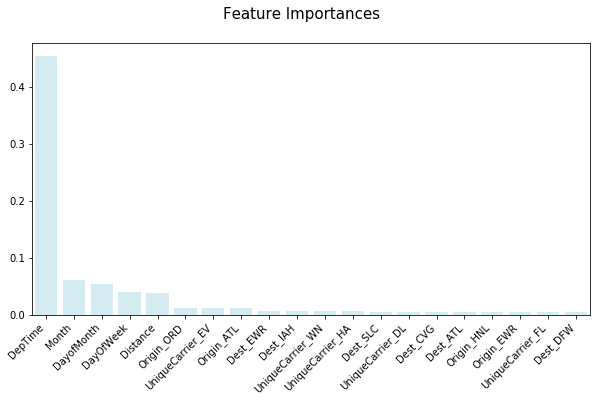

Number of thresholds = 29993
Delays in training set: 13376, no-delays: 56624
Delays in test set: 5668, no-delays: 24332
Intrinsic discrepancy in training set: inf, in test set: 0.29475501344093313


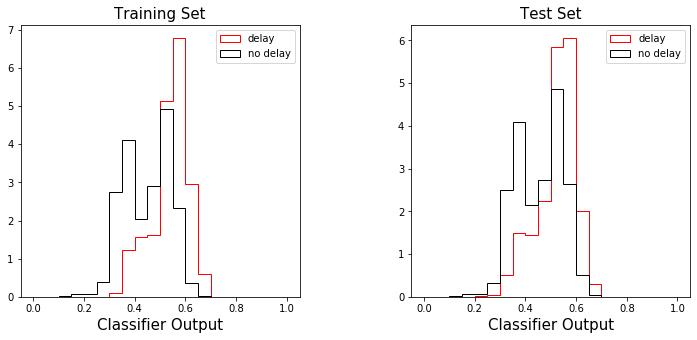

Area under test ROC =  0.7172140258127657
Area under train ROC = 0.7854930008798069


In [190]:
from sklearn import metrics
import numpy as np

print('Number of test values = %i' %len(y_test))
print('Number of test values equal to True = %i' %(len([val for val in y_test if val])))

# Compute and plot feature importances
importances = rf2.feature_importances_
indices     = np.argsort(importances)[::-1]
n_features  = min(20,indices.size)
bins        = np.arange(n_features)
x_labels    = np.array(features)[indices][:n_features]
fig, axes   = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
plt.suptitle("Feature Importances", fontsize=15)
axes.bar(bins, importances[indices][:n_features], align="center", color="lightblue", alpha=0.5)
axes.set_xticks(bins)
axes.set_xticklabels(x_labels, ha="right", rotation=45.)
axes.set_xlim([-0.5,bins.size-0.5])
plt.show()
#fig.savefig('FeatureImportances.png', dpi=200, bbox_inches='tight')

# Compute precision, recall, and queue rate as a function of threshold
y_test_pred    = [p2 for [p1,p2] in rf2.predict_proba(X_test)]
y_train_pred   = [p2 for [p1,p2] in rf2.predict_proba(X_train)]
td0_precision, td0_recall, td0_thresholds = metrics.precision_recall_curve(y_test, y_test_pred)
td0_thresholds = np.append(td0_thresholds, 1)
n_thresholds   = td0_thresholds.size
print('Number of thresholds = %i' %n_thresholds)
n_max          = 100
qr_thresholds  = np.linspace(0.0, 1.0, n_max+1)
td0_queue_rate = []  
for threshold in qr_thresholds:  
    td0_queue_rate.append((y_test_pred >= threshold).mean())

# Histogram random forest output probabilities
y_train_pred_1 = [pred for (pred,truth) in zip(y_train_pred,y_train) if truth==1]
y_train_pred_0 = [pred for (pred,truth) in zip(y_train_pred,y_train) if truth==0]
y_test_pred_1  = [pred for (pred,truth) in zip(y_test_pred,y_test) if truth==1]
y_test_pred_0  = [pred for (pred,truth) in zip(y_test_pred,y_test) if truth==0]
print("Delays in training set: %i, no-delays: %i" %(len(y_train_pred_1),len(y_train_pred_0)))
print("Delays in test set: %i, no-delays: %i" %(len(y_test_pred_1),len(y_test_pred_0)))
bin_edges        = np.linspace(0.0,1.0,11)
hist1,bin_edges1 = np.histogram(y_train_pred_1, bins=bin_edges, density=False)
hist2,bin_edges2 = np.histogram(y_train_pred_0, bins=bin_edges, density=False)
indis_train      = intrinsic_discrepancy(hist1, hist2)
hist1,bin_edges1 = np.histogram(y_test_pred_1, bins=bin_edges, density=False)
hist2,bin_edges2 = np.histogram(y_test_pred_0, bins=bin_edges, density=False)
indis_test       = intrinsic_discrepancy(hist1, hist2)
print("Intrinsic discrepancy in training set: %s, in test set: %s" %(indis_train,indis_test))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
plt.subplots_adjust(wspace=0.40)
axes[0].hist(y_train_pred_1, bins=20, range=[0.0,1.0], color=Ycol, histtype="step", label="delay", density=True)
axes[0].hist(y_train_pred_0, bins=20, range=[0.0,1.0], color=Ncol, histtype="step", label="no delay", density=True)
axes[0].set_xlabel("Classifier Output", fontsize=15)
axes[0].legend(prop={'size': 10}, loc="upper right")
axes[0].set_title("Training Set", fontsize=15)
axes[1].hist(y_test_pred_1, bins=20, range=[0.0,1.0], color=Ycol, histtype="step", label="delay", density=True)
axes[1].hist(y_test_pred_0, bins=20, range=[0.0,1.0], color=Ncol, histtype="step", label="no delay", density=True)
axes[1].set_xlabel("Classifier Output", fontsize=15)
axes[1].legend(prop={'size': 10}, loc="upper right")
axes[1].set_title("Test Set", fontsize=15)
plt.show()
#fig.savefig('RF_probabilities.png', dpi=200, bbox_inches='tight')
    
# Plot precision, recall, and queue rate
# fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
# axis.plot(td0_thresholds, td0_precision, color="blue", label="precision")
# axis.plot(td0_thresholds, td0_recall, color="green", label="recall")
# axis.plot(qr_thresholds, td0_queue_rate, color="orange", label="queue rate")
# axis.set_xlabel("Threshold", fontsize=15)
# axis.set_xlim(0.0, 1.0)
# axis.set_ylim(0.0, 1.0)
# axis.grid(which="major", axis="both")
# axis.legend(prop={'size': 10}, loc="lower right")
# plt.show()
#fig.savefig("PRQ.png", dpi=200, bbox_inches="tight")

# Compute and plot ROC
# fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
# fpr_test, tpr_test, thresholds   = metrics.roc_curve(y_test, y_test_pred)
# auroc_test                       = metrics.auc(fpr_test,tpr_test)
# fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, y_train_pred)
# auroc_train                      = metrics.auc(fpr_train,tpr_train)
# axis.plot(fpr_test, tpr_test, color="blue", label="test")
# axis.plot(fpr_train, tpr_train, color="orange", label="train")
# axis.plot([0.0,1.0], [0.0,1.0], 'k--')
# axis.set_xlabel("False Positive Rate", fontsize=15)
# axis.set_ylabel("True Positive Rate", fontsize=15)
# axis.set_xlim(0.0, 1.0)
# axis.set_ylim(0.0, 1.0)
# axis.legend(prop={'size': 10}, loc="lower right")
# plt.show()
#fig.savefig('ROC.png', dpi=200, bbox_inches='tight')

print('Area under test ROC =  %s' %auroc_test)
print('Area under train ROC = %s' %auroc_train)

In [196]:
df2

,Month,DayofMonth,DayOfWeek,DepTime,Distance,dep_delayed_15min,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,...,Dest_TYS,Dest_VCT,Dest_VIS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YUM
0,8,21,7,1934,732,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,20,3,1548,834,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,2,5,1422,416,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,25,6,1015,872,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,7,6,1828,423,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5,4,3,1618,199,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,1,18,3,804,884,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,1,24,2,1901,1076,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99998,4,27,4,1515,140,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
Y = df['dep_delayed_15min']

In [27]:
X = df[['Month','DayofMonth','DayOfWeek','Distance']]

In [28]:
model = LinearRegression()

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [30]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
model.coef_

array([ 2.34781419e-03,  1.03974545e-03,  1.54177325e-03, -3.51920942e-06])

In [32]:
metrics.mean_absolute_error(model.predict(X_test),Y_test)

0.30644319471821196

In [33]:
metrics.mean_squared_error(model.predict(X_test),Y_test)

0.1515265250694629

In [34]:
metrics.mean_squared_log_error(model.predict(X_test),Y_test)

0.07493393616200697

In [35]:
metrics.r2_score(model.predict(X_test),Y_test)

-944.5938289304644

In [36]:
model.predict(X_test)

array([0.18777407, 0.19778706, 0.19106806, ..., 0.18766627, 0.15928099,
       0.18711354])

In [37]:
total = df['dep_delayed_15min'].count()
delayed = df['dep_delayed_15min'].sum()
not_delayed = total - delayed

In [42]:
# sns.set(style="whitegrid")

# f, ax = plt.subplots(figsize=(6, 15))

# sns.set_color_codes("pastel")
# sns.barplot(x=delayed, y="UniqueCarrier", data=df,
#             label="delayed", color="b")

# sns.set_color_codes("muted")
# sns.barplot(x=not_delayed, y="UniqueCarrier", data=df,
#             label="not_delayed", color="b")

# ax.legend(ncol=2, loc="lower right", frameon=True)
# ax.set(xlim=(0, 24), ylabel="",
#        xlabel="Automobile collisions per billion miles")
# sns.despine(left=True, bottom=True)

In [43]:
# crashes

In [44]:
days_in_month = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
def day_31_to_365(x):
    days_365 = days_in_month[:x['Month']-1].sum() + x['DayofMonth']
    return days_365

In [45]:
df['DayofMonth'] = df.apply(day_31_to_365,axis = 1)

In [46]:
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,233,7,1934,AA,ATL,DFW,732,0
1,4,110,3,1548,US,PIT,MCO,834,0
2,9,245,5,1422,XE,RDU,CLE,416,0
3,11,329,6,1015,OO,DEN,MEM,872,0
4,10,280,6,1828,WN,MDW,OMA,423,1
...,...,...,...,...,...,...,...,...,...
99995,5,124,3,1618,OO,SFO,RDD,199,0
99996,1,18,3,804,CO,EWR,DAB,884,0
99997,1,24,2,1901,NW,DTW,IAH,1076,0
99998,4,117,4,1515,MQ,DFW,GGG,140,0


In [47]:
# for i in df['DepTime']:
#     if i <=2400:
#         df['DepTime'] = np.ceil(df['DepTime']/600).apply(int)
#     else:
#         df['DepTime'] = 4
def dadada(val):
    if val <= 2400:
        g= df['DepTime'] = np.ceil(val/600)
        return g
    else:
        f = df['DepTime'] = np.round(val/600)
        return f
df['DepTime'] = df['DepTime'].apply(lambda x: round(dadada(x)),0)

In [48]:
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,233,7,4,AA,ATL,DFW,732,0
1,4,110,3,3,US,PIT,MCO,834,0
2,9,245,5,3,XE,RDU,CLE,416,0
3,11,329,6,2,OO,DEN,MEM,872,0
4,10,280,6,4,WN,MDW,OMA,423,1
...,...,...,...,...,...,...,...,...,...
99995,5,124,3,3,OO,SFO,RDD,199,0
99996,1,18,3,2,CO,EWR,DAB,884,0
99997,1,24,2,4,NW,DTW,IAH,1076,0
99998,4,117,4,3,MQ,DFW,GGG,140,0


In [49]:
df['WEEK'] = df['DayofMonth']//7

In [50]:
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,WEEK
0,8,233,7,4,AA,ATL,DFW,732,0,33
1,4,110,3,3,US,PIT,MCO,834,0,15
2,9,245,5,3,XE,RDU,CLE,416,0,35
3,11,329,6,2,OO,DEN,MEM,872,0,47
4,10,280,6,4,WN,MDW,OMA,423,1,40
...,...,...,...,...,...,...,...,...,...,...
99995,5,124,3,3,OO,SFO,RDD,199,0,17
99996,1,18,3,2,CO,EWR,DAB,884,0,2
99997,1,24,2,4,NW,DTW,IAH,1076,0,3
99998,4,117,4,3,MQ,DFW,GGG,140,0,16


In [51]:
Delay_vs_Day_of_Week = pd.DataFrame({'delays' : df.groupby(['DayOfWeek'])['dep_delayed_15min'].mean()}).reset_index()
Delay_vs_WEEK = pd.DataFrame({'delays' : df.groupby(['WEEK'])['dep_delayed_15min'].mean()}).reset_index()
Delay_vs_AIRLINE = pd.DataFrame({'delays' : df.groupby(['UniqueCarrier'])['dep_delayed_15min'].mean()})#.reset_index()
Delay_vs_SCHEDULED_DEPARTURE = pd.DataFrame({'delays' : df.groupby(['DepTime'])['dep_delayed_15min'].mean()}).reset_index()

#Delay_vs_Day_of_Week.plot(x='DAY_OF_WEEK', y='delays')
#Delay_vs_Day_of_Week['delays'].hist(hold=None)

In [52]:
df['DepTime'].value_counts()

2.0    38266
3.0    37390
4.0    21944
1.0     2400
Name: DepTime, dtype: int64

[Text(0, 0, '00:00 - 06:00'),
 Text(0, 0, '06:00 - 12:00'),
 Text(0, 0, '12:00 - 18:00'),
 Text(0, 0, '18:00 - 00:00')]

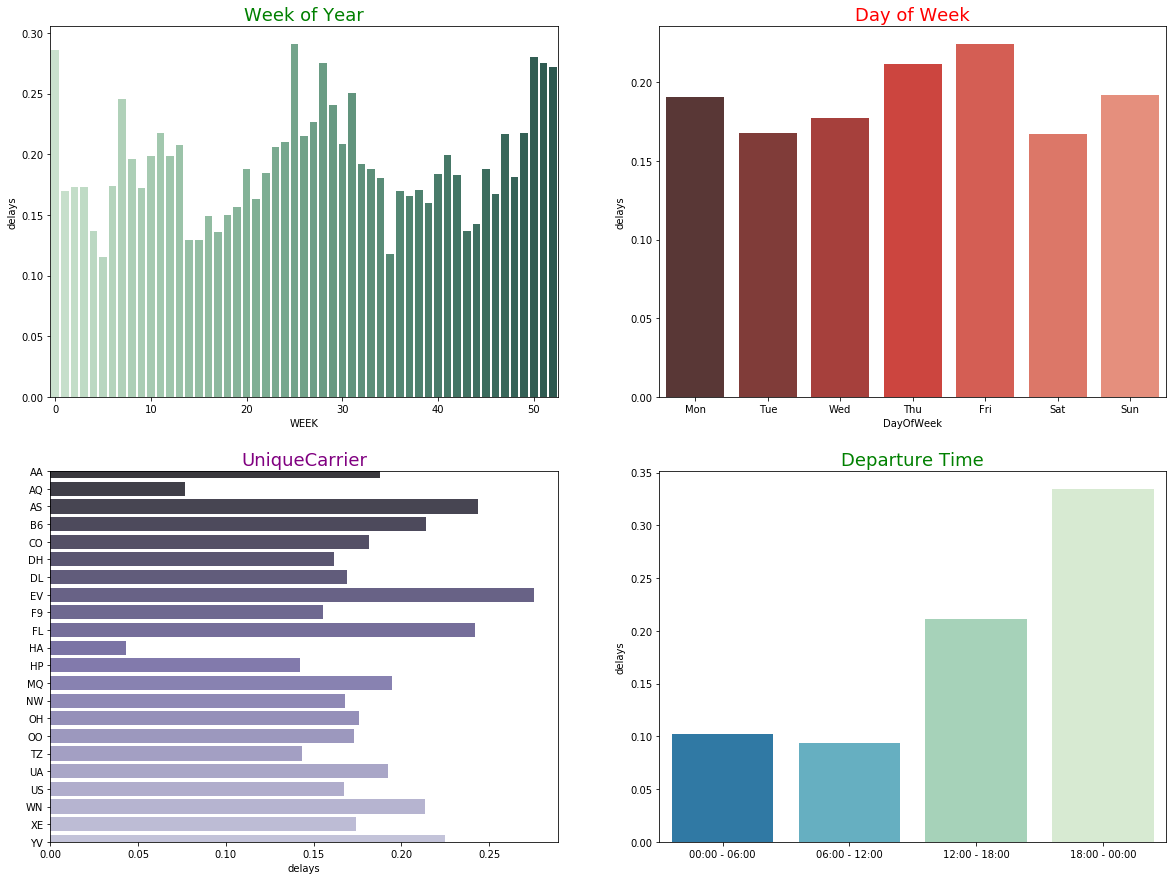

In [198]:
fig = plt.figure(figsize=(20, 15))

sub1 = fig.add_subplot(221) # instead of plt.subplot(2, 2, 1)
sub1.set_title('Week of Year', fontsize=18, color="green")
sns.barplot(x="WEEK", y="delays", data=Delay_vs_WEEK, palette="ch:2.5,-.2,dark=.3", ax = sub1)
sub1.set_xticks(list(range(0,52,10)))
sub1.set_xticklabels(list(range(0,52,10)))

sub2 = fig.add_subplot(222)
sub2.set_title('Day of Week', fontsize=18, color="red")
sns.barplot(x="DayOfWeek", y="delays", data=Delay_vs_Day_of_Week, palette="Reds_d", ax = sub2)
sub2.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

sub3 = fig.add_subplot(223)
sub3.set_title('UniqueCarrier', fontsize=18, color="purple")
sns.barplot(y = list(range(len(Delay_vs_AIRLINE))), x=Delay_vs_AIRLINE['delays'], palette="Purples_d", ax = sub3, orient="h")
sub3.set_yticks(range(len(Delay_vs_AIRLINE)))
sub3.set_yticklabels(Delay_vs_AIRLINE.index)

sub4 = fig.add_subplot(224)
sns.barplot(x = list(range(len(Delay_vs_SCHEDULED_DEPARTURE))), y=Delay_vs_SCHEDULED_DEPARTURE['delays'], palette="GnBu_r", ax = sub4)
sub4.set_title('Departure Time', fontsize=18, color="green")
sub4.set_xticks([0, 1, 2, 3])
sub4.set_xticklabels(['00:00 - 06:00','06:00 - 12:00','12:00 - 18:00','18:00 - 00:00'])

In [101]:
flights_on_time = df[df['dep_delayed_15min']==0]
flights_on_delay = df[df['dep_delayed_15min']==1]

In [102]:
flights_on_time

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,AA,ATL,DFW,732,0
1,4,20,3,1548,US,PIT,MCO,834,0
2,9,2,5,1422,XE,RDU,CLE,416,0
3,11,25,6,1015,OO,DEN,MEM,872,0
5,8,3,4,1918,NW,MEM,MCO,683,0
...,...,...,...,...,...,...,...,...,...
99995,5,4,3,1618,OO,SFO,RDD,199,0
99996,1,18,3,804,CO,EWR,DAB,884,0
99997,1,24,2,1901,NW,DTW,IAH,1076,0
99998,4,27,4,1515,MQ,DFW,GGG,140,0


In [55]:
flights_on_time = flights_on_time['dep_delayed_15min']
flights_on_delay = flights_on_delay['dep_delayed_15min']

In [56]:
flights_on_delay

4        1
18       1
21       1
33       1
35       1
        ..
99971    1
99976    1
99980    1
99989    1
99993    1
Name: dep_delayed_15min, Length: 19044, dtype: int64

In [57]:
# sns.set(style="whitegrid")

# f, ax = plt.subplots(figsize=(16, 5))

# sns.set_color_codes("pastel")
# sns.barplot(x='UniqueCarrier', y=flights_on_delay, data=df,
#             label="delayed", color="b")

# sns.set_color_codes("muted")
# sns.barplot(x='UniqueCarrier', y=flights_on_time, data=df,
#             label="not_delayed", color="b")

# ax.legend(ncol=2, loc="lower right", frameon=True)
# ax.set(xlim=(0, 24), ylabel="",
#        xlabel="Automobile collisions per billion miles")
# sns.despine(left=True, bottom=True)